In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #generar set de prueba
from sklearn.linear_model import LogisticRegression #regresión logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [270]:
df = pd.read_excel("df_limpio.xlsx")

In [271]:
#1. Seleccionamos las variables de interés.
status = df.iloc[ : , [7,29,9,11,12,13,27,25,30,24]]

In [272]:
#2. Verificamos datos nulos
status.isnull().sum()

precio                 0
porc_eng               0
descuento              0
monto_financiado       0
costo_total            0
monto_accesorios       0
score_buro             0
puntos                 0
limite_credito         0
status_cuenta       3314
dtype: int64

In [273]:
# 3. Utilizaremos como variable dependinte "status_cuenta" con un filtro que catalogue "fraude" y "corriente"
status = status[(status["status_cuenta"]=="Fraude") |(status["status_cuenta"]=="Mora") |(status["status_cuenta"]=="Cancelado") |(status["status_cuenta"]=="Atraso") |(status["status_cuenta"]=="Corriente") ]
#status.info()

In [274]:
#Vamos a cambiar las categorías.
status["status_cuenta"]=status["status_cuenta"].replace("Fraude",0)
status["status_cuenta"]=status["status_cuenta"].replace("Cancelado",0)
status["status_cuenta"]=status["status_cuenta"].replace("Atraso",0)
status["status_cuenta"]=status["status_cuenta"].replace("Mora",0)
status["status_cuenta"]=status["status_cuenta"].replace("Corriente",1)

#Aplicar if


In [275]:
frecuenciaStatus = status["status_cuenta"].value_counts()
frecuenciaStatus

status_cuenta
1    10014
0     9407
Name: count, dtype: int64

In [276]:
X = status[["precio","porc_eng","costo_total","limite_credito","score_buro","monto_accesorios"]]
y = status[["status_cuenta"]]

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [278]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

c:\Users\Carlos Casillas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [279]:
y_pred = logistic_model.predict(X_test)


In [280]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.61


In [281]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[1024  890]
 [ 607 1364]]


In [282]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1914
           1       0.61      0.69      0.65      1971

    accuracy                           0.61      3885
   macro avg       0.62      0.61      0.61      3885
weighted avg       0.62      0.61      0.61      3885



In [283]:
# Curva ROC y calculamos el AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

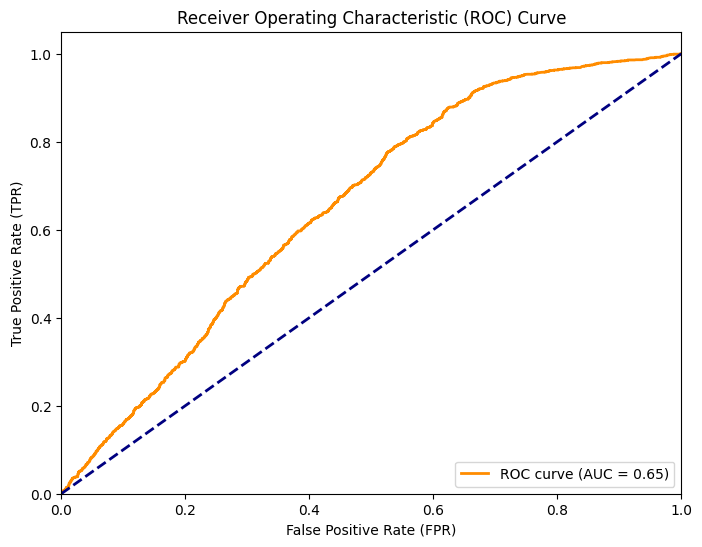

In [284]:
# Realizamos el gráfico de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
